# Post Mandate 3

Here we will replace the weather responses with current/live responses as discussed before.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')
from nltk.util import ngrams
import random
import spacy
NER = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Saved the **generated-response data (response_record)** and **intent classification data(intent_record)** of previous notebook file for test data. Now will load them here.

In [ ]:
import pickle

# Read dictionary pkl file
with open('intent_record.pkl', 'rb') as fp:
    intent_record = pickle.load(fp)
    #print(intent_record)

In [ ]:
with open('response_record.pkl', 'rb') as fp:
    response_record = pickle.load(fp)
    print('Response dictionary')
    print(response_record)

Response dictionary
{'Thank you!': "You're welcome!", 'Set the appointment to be a lab appointment.': 'Okay, setting a lab meeting at 4 pm on the 12th with HR.', 'thank you': "You're welcome!", 'Send me its address and pick a route to avoid all heavy traffic please': 'There is a road block nearby but there is no contest on the route to get there', 'Thank you very much car!': "You're welcome!", 'Thanks.': "You're welcome!", 'Perfect, thank you!': "You're welcome.", 'set steering wheel boost gentle': 'Sure sir, I will help you with steering wheel', 'i have a dentist appointment on the 12th of this month': 'What date and time would you like me to set the reminder for?', 'steering wheel boost changed gentle': ' done!!', 'pull n% window': ' Okay it will be done!!', 'remind me i have a tennis match on the 12th': 'What time should I remind you about tennis?', 'Thank you for the information. ': "You're welcome!", 'I want coffee.': 'Cafe Venetia is located at 383 University Ave. ', 'Pick a quic

In [ ]:
test_response=[]
with open(r'test_response.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = line[:-1]

        # add current item to the list
        test_response.append(x)

In [ ]:
test_query=[]
with open(r'test_query.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = line[:-1]

        # add current item to the list
        test_query.append(x)

In [ ]:
len(intent_record)==len(response_record)

False

We will use **openweatherapi** to fetch live weather data.

What will happen is:

For those **queries** whose intent is classified as weather by our **intent-classifier model**, from them the name of the **place/location** whose weather using **Spacy NER module** is being asked is retrieved using **openweatherapi** and then the original response for that query in **response_record** is replaced by the weather data fetched.

In [ ]:
import requests
def weather_data(name_place):
  api_key = "90b5d2680321bccfd47c70fdcd4c8703"  # Enter the API key you got from the OpenWeatherMap website
  base_url = "http://api.openweathermap.org/data/2.5/weather?"

#city_name = input("Enter city name : ")
  complete_url = base_url + "appid=" + 'd850f7f52bf19300a9eb4b0aa6b80f0d' + "&q=" + name_place  # This is to complete the base_url, you can also do this manually to checkout other weather data available
  response = requests.get(complete_url)
#print(response)
  x = response.json()

  types={}
  name1='overall weather status at '+name_place+' is'
  types[name1]=x['weather'][0]['description']
  name2='and current temperature in C is '
  types[name2]=round(x['main']['temp']-273.15,2)
  return types


def remove_puncs(test_str): # this function removes the punctuations
    import re
    test_str=test_str.lower()
    res = re.sub(r'[^\w\s]', '', test_str)
    return res

for text in intent_record:
  #some thank you statements are categorized as weather, they shouldn't be, so ignoring such queries/statements
  if intent_record[text]=='weather' and 'thank' not in remove_puncs(text) and len(remove_puncs(text))>3:
      text1=NER(text)
      print(text1)
      for word in text1.ents:
          if word.label_=='GPE':
              #print('word')
              vals1=weather_data(word.text)
              #print(vals1)
              response_record[text]=vals1



Can you tell me about Menlo Park?
Will it be cloudy in Manhattan today and tomorrow?
Seattle, please.
what's the weather forecast for today and tomorrow
Carson.
show me this week's forecast
I want to know if it will be humid in Manhattan today.
Will it be hot in Brentwood?
durham
give me this week's high temperature
is it going to be cloudy in the next 7 days
what is the forecast for the rest of the day
what's the temperature in the city
San mateo, will it be overcast?
what is the current temperature
is there a chance of snow in this weeks weather forecast
I need the forecast for San Francisco please. For today to be exact. 
what is the weather like for tomorrow night
how is the weather in the city this weekend
what is the weather going to be like today and tomorrow
Redwood City please.
Is it gonna be any blizzard on Tuesday in Alhambra?
I would like to know for San Mateo.
is it going to snow today
I want to hear grand rapids highest temperature for today and tomorrow
Will it be windy 

In [ ]:
response_record['can you give me the weather this week for new york city']

{'overall weather status at new york city is': 'few clouds',
 'and current temperature in C is ': 9.25}

As we can see in above example, one of the response is replaced by the live location weather (in this case weather of new york city).

In [ ]:
# some more query's response checking

print(response_record['Will it be any blizzard on Sunday in Alhambra?'])
print('\n')
print(response_record['tell me the weather for this week'])
print('\n')
print(response_record['is it going to rain at all this upcoming week'])
print('\n')

{'overall weather status at Alhambra is': 'clear sky', 'and current temperature in C is ': 11.08}


What city do you want the weather forecast for?


What city would you like to know if it will rain this week?




So finally the modified **response_record** dictionary contains our final query-response pairs.

In the last cell we can see that even if the user don't mention the city for which he wants to know the weather, the chatbot rightly asks the user which city he wants to know the weather of.

# Evaluation of Model

# User Satisfaction Rate

Rating given manually by a human user( this case only me) on a scale on 10, on how satisfied he is with the responses.

In [ ]:
# Run this cell to give manual scores

#c=0
#score=[]
#while c<5:
#for i in response_record:
#  print('query: ',i)
 # print('response: ',response_record[i])
 # ini=int(input('Enter score out of 10: '))
 # score.append(ini)
#print(round(sum(score) / len(score),2))

In [ ]:
import pandas as pd


test_query22=[]
with open(r'results.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        if line[-1]=='\n':
          x = line[:-1]
        else:
          x=line

        # add current item to the list
        test_query22.append(x)


scores1=[]

for i in range(0,len(test_query22),3):
  #print(test_query22[i].split(':'))
  #print(test_query22[i+2].split()[-1])
  scores1.append(int(test_query22[i+2].split()[-1]))
print('Average score of all query: ',round(sum(scores1)/len(scores1),2))



df_intent=pd.DataFrame([intent_record.keys(),intent_record.values()]).T
df_intent.columns=['query','intent']
df_intent['scores']=scores1
df_intent.groupby('intent').agg({'scores':['mean','count']}).round(2)

Average score of all query:  7.27


scores      
                  mean count
intent                      
Camera            8.82    17
car control       7.45    20
navigate          7.17   113
schedule          7.23    74
system settings   9.00     1
weather           6.97    60

<Axes: xlabel='intent', ylabel='scores'>

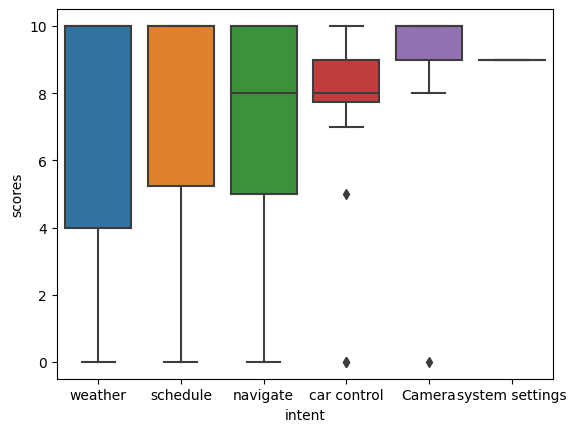

In [ ]:
import seaborn as sns
sns.boxplot(data=df_intent, x="intent", y="scores")

Overall satisfaction rate for all the queries is okayish but there is scope for improvement.

**Weather** related responses needs to be improved, same for **navigation** & scheduling. **Car control** and **camera** have good user satisfaction rate. There is higher variability in the rating of the responses of **weather, schedule, navigate** queries.


Just note there is **imbalance** in the number of queries for each catagory.


# BLEU Score

Manual evaluation can be **biased** from human to human so **BLEU** score is also tried. It's a score between 0-1, based on how similar/close the generated response is to the origical/correct response.

In [ ]:
results2=[]
with open(r'results2.txt', 'r') as fp:
    for line in fp:
        #print(len(line))
        if len(line)>1:
        # remove linebreak from a current name
        # linebreak is the last character of each line
          x = line[:-1]
          #print(x)
        #else:
          #pass

        # add current item to the list
          results2.append(x)

In [ ]:
results3={}
for i,j in zip(range(1,len(results2),4), range(2,len(results2),4)):
  print(results2[i])
  print(results2[j])
  results2a=results2[i].split('User:')[-1].strip()
  results2b=results2[j].split('Reference:')[-1].strip()
  results3[results2a]=results2b


response_record2={}
for i in response_record:
      zk4=i.strip()
      response_record2[zk4]=response_record[i]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
def remove_puncs(test_str):
    import re
    test_str=test_str.lower()
    #test_str = test_str.translate
    #test_str=str.maketrans('', '', string.punctuation)
    test_str = re.sub(r'[^\w\s]', '', test_str)
    #res = re.sub(r'[!,;.]', '', test_str)
    return test_str

scores=[]
for i in results3:
  #print(i)
  ##print(i)
  #print('---------------------')
  if i in response_record2 and type(response_record2[i]) is not dict:
     reference=[remove_puncs(results3[i]).split()]
  #kk=i.strip()
     sen=remove_puncs(response_record2[i]).split()
  #print(sentence_bleu(reference, sen, weights=(0.5, 0.5, 0, 0)))
     scores.append(sentence_bleu(reference, sen, weights=(0.5, 0.5, 0, 0)))
print(round(sum(scores)/len(scores),2))

0.27


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

**BLEU** score also suggest there is scope of improvement.

# Key Takeways

After taking this course and doing this project, the following things I learnt:



1. Learnt about **various challenges** faced in any nlp task like **coreference resolution** etc.

2. Learnt about different methods to perform **data exploration and preprocessing textual data**. Leant the concepts of **embeddings of** text.

4. Leant ways to prepare **fine-tuning dataset** for transformer based models.

3. Learnt concepts of **LLMs** with hands-on experience, especially in the domain of **conversational agents**.

4. Learnt ways to evaluate our LLM models **efficiency** and improve further.